In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random

In [2]:
#alpha: feature activation vector
#w: basis matrix
#z_l,z_r: latent eye specific variable
#x_l,x_r: image input
#std: image noise
#std_0: std on element of activation
#sampling algorithm: gibbs sampling

In [21]:
def sample_alpha(w,x_l,x_r,z_l,z_r,std,std_0):
    no_basis = w.shape[1]
    i = np.identity(no_basis)
    sigma = np.linalg.inv((z_l+z_r)/std**2*np.matmul(w.T,w)+i/std_0**2)
    mu = 1/std**2*np.matmul(sigma,np.matmul(w.T,(z_l*x_l+z_r*x_r)))
    return mu+np.matmul(np.linalg.cholesky(sigma),random.randn(no_basis).reshape(no_basis,1))

def sample_z_l(w,alpha,x_l,std):
    p_l_10 = min(np.exp(-1/2/std**2*np.linalg.norm(x_l)**2+1/2/std**2*np.linalg.norm(x_l-np.matmul(w,alpha))**2),1e10)
    return (np.sign(1/(1+p_l_10)-random.random())+1)/2

def sample_z_r(w,alpha,x_r,std):
    p_r_10 = min(np.exp(-1/2/std**2*np.linalg.norm(x_r)**2+1/2/std**2*np.linalg.norm(x_r-np.matmul(w,alpha))**2),1e10)
    return (np.sign(1/(1+p_r_10)-random.random())+1)/2

In [22]:
def simulation(x_l,x_r,w,std,std_0,no_steps):
    no_basis = w.shape[1]
    alpha_list = []
    z_l_list = []
    z_r_list = []
    z_l = random.randint(0,2)
    z_r = random.randint(0,2)
    alpha = np.random.randn(no_basis).reshape(no_basis,1)
    for i in range(no_steps):
        alpha = sample_alpha(w,x_l,x_r,z_l,z_r,std,std_0)
        alpha_a = alpha.copy().reshape(no_basis)
        alpha_list.append(alpha_a)
        z_l=sample_z_l(w,alpha,x_l,std)
        z_l_a = z_l.copy()
        z_l_list.append(z_l_a)
        z_r=sample_z_r(w,alpha,x_r,std)
        z_r_a = z_r.copy()
        z_r_list.append(z_r_a)
    return np.array(alpha_list),np.array(z_l_list),np.array(z_r_list)



In [23]:
theta = np.pi/4
lamda = 2
sigma = 1.5
X = np.arange(-5,5,0.5)
X = X
Y = np.arange(-5,5,0.5)
Y = Y
X,Y = np.meshgrid(X,Y)
X_dot = X*np.cos(theta)+Y*np.sin(theta)
Y_dot = -X*np.sin(theta)+Y*np.cos(theta)
G = np.exp(-(X_dot**2+lamda*Y_dot**2)/(2*sigma**2))*np.cos(2*np.pi*X_dot/lamda)
theta1 = np.pi/1.5
X_dot1 = X*np.cos(theta1)+Y*np.sin(theta1)
Y_dot1 = -X*np.sin(theta1)+Y*np.cos(theta1)
G1 = np.exp(-(X_dot1**2+lamda*Y_dot1**2)/(2*sigma**2))*np.cos(2*np.pi*X_dot1/lamda)

In [39]:
x_l = np.array([1.4,0]).reshape(2,1)
x_r = np.array([-1,0]).reshape(2,1)
w = np.identity(2)
std = 0.1**0.5
std_0 = 5
no_steps = 2000000
alpha,z_l,z_r = simulation(x_l,x_r,w,std,std_0,no_steps)

/var/folders/04/wzq37d2s3bv87g77m67thbk80000gn/T/ipykernel_33739/2795173247.py:9: RuntimeWarning: overflow encountered in exp
  p_l_10 = min(np.exp(-1/2/std**2*np.linalg.norm(x_l)**2+1/2/std**2*np.linalg.norm(x_l-np.matmul(w,alpha))**2),1e10)
/var/folders/04/wzq37d2s3bv87g77m67thbk80000gn/T/ipykernel_33739/2795173247.py:13: RuntimeWarning: overflow encountered in exp
  p_r_10 = min(np.exp(-1/2/std**2*np.linalg.norm(x_r)**2+1/2/std**2*np.linalg.norm(x_r-np.matmul(w,alpha))**2),1e10)


Text(0.5, 0, 'x')

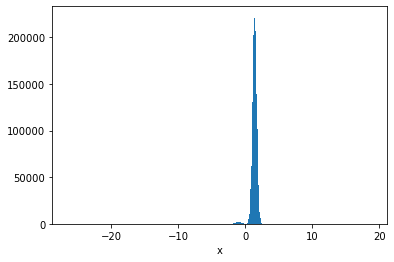

In [40]:
plt.hist(alpha[:,0],500)
plt.xlabel('x')

Text(0.5, 0, 'x')

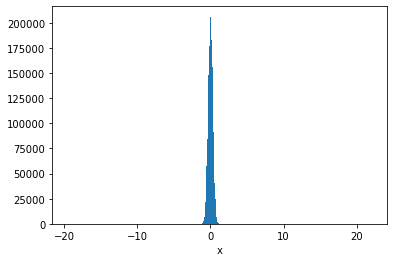

In [41]:
plt.hist(alpha[:,1],500)
plt.xlabel('x')

In [42]:
def pi_count_1(pi_l,pi_r):
    '''lr = 00,01,10,11'''
    pi_l_1 = pi_l.copy()
    pi_l_1 = pi_l_1*2
    pi_class = pi_l_1+pi_r
    return np.array([len(np.where(pi_class==0)[0])/len(pi_l),len(np.where(pi_class==1)[0])/len(pi_l),len(np.where(pi_class==2)[0])/len(pi_l),len(np.where(pi_class==3)[0])/len(pi_l)])

In [43]:
pi_count_1(z_l,z_r)

array([1.40985e-02, 8.37500e-03, 9.77482e-01, 4.45000e-05])

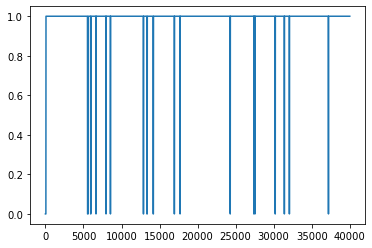

In [47]:
plt.plot(z_l[:40000])

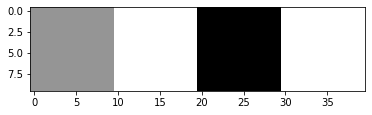

In [10]:
plt.imshow(np.hstack((0.5*np.ones((10,10)),np.zeros((10,10)),np.ones((10,10)),np.zeros((10,10)))), cmap = 'Greys')

In [11]:
def cal_p(x_l,x_r,std,std0):
    p00_r = 1/std**4*np.exp(-1/2/std**2*(np.linalg.norm(x_l)**2+np.linalg.norm(x_r)**2)+20)

    p01_r = 1/std**4/std0**2*np.exp(-1/2/std**2*np.linalg.norm(x_l)**2+20)
    sigma_01 = (1/std**2+1/std0**2)**-1*np.identity(2)
    mu_01 = 1/std**2*np.matmul(sigma_01,x_r)
    lamda_01 = 1/std**2*np.linalg.norm(x_r)**2-np.linalg.norm(mu_01)**2*(1/std0**2+1/std**2)
    p01_r = p01_r*np.exp(-1/2*lamda_01)*np.linalg.det(sigma_01)**0.5

    p10_r = 1/std**4/std0**2*np.exp(-1/2/std**2*np.linalg.norm(x_r)**2+20)
    sigma_10 = (1/std**2+1/std0**2)**-1*np.identity(2)
    mu_10 = 1/std**2*np.matmul(sigma_10,x_l)
    lamda_10 = 1/std**2*np.linalg.norm(x_l)**2-np.linalg.norm(mu_10)**2*(1/std0**2+1/std**2)
    p10_r = p10_r*np.exp(-1/2*lamda_10)*np.linalg.det(sigma_10)**0.5

    p11_r = 1/std**4/std0**2
    sigma_11 = (1/std0**2+2/std**2)**-1*np.identity(2)
    mu_11 = 1/std**2*np.matmul(sigma_11,x_l+x_r)
    lamda_11 = 1/std**2*(np.linalg.norm(x_l)**2+np.linalg.norm(x_r)**2)-np.linalg.norm(mu_11)**2*(1/std0**2+2/std**2)
    p11_r = p11_r*np.exp(-1/2*lamda_11+20)*np.linalg.det(sigma_11)**0.5

    print(np.array([p00_r,p01_r,p10_r,p11_r]))

    return np.array([p00_r,p01_r,p10_r,p11_r])/(p00_r+p01_r+p10_r+p11_r)
    

In [12]:
def cal_p1(x_l,x_r,std,std0):
    p00_r = 1/std**4

    p01_r = 1/std**4/std0**2
    sigma_01 = (1/std**2+1/std0**2)**-1*np.identity(2)
    mu_01 = 1/std**2*np.matmul(sigma_01,x_r)
    lamda_01 = -np.linalg.norm(mu_01)**2*(1/std0**2+1/std**2)
    p01_r = p01_r*np.exp(-1/2*lamda_01)*np.linalg.det(sigma_01)**0.5

    p10_r = 1/std**4/std0**2
    sigma_10 = (1/std**2+1/std0**2)**-1*np.identity(2)
    mu_10 = 1/std**2*np.matmul(sigma_10,x_l)
    lamda_10 = -np.linalg.norm(mu_10)**2*(1/std0**2+1/std**2)
    p10_r = p10_r*np.exp(-1/2*lamda_10)*np.linalg.det(sigma_10)**0.5

    p11_r = 1/std**4/std0**2
    sigma_11 = (1/std0**2+2/std**2)**-1*np.identity(2)
    mu_11 = 1/std**2*np.matmul(sigma_11,x_l+x_r)
    lamda_11 = -np.linalg.norm(mu_11)**2*(1/std0**2+2/std**2)
    p11_r = p11_r*np.exp(-1/2*lamda_11)*np.linalg.det(sigma_11)**0.5

    print(np.array([p00_r,p01_r,p10_r,p11_r]))

    return np.array([p00_r,p01_r,p10_r,p11_r])/(p00_r+p01_r+p10_r+p11_r)

In [13]:
x_l = np.array([0.5,0]).reshape(2,1)
x_r = np.array([-0.5,0]).reshape(2,1)
std = 0.1
std0 = 1
cal_p(x_l,x_r,std,std0)

[6.73794700e+01 1.58175029e+05 1.58175029e+05 3.35221244e-01]


array([2.12944644e-04, 4.99892998e-01, 4.99892998e-01, 1.05942609e-06])

Text(0.5, 1.0, 'p(z_l,z_r = 1 | ...)')

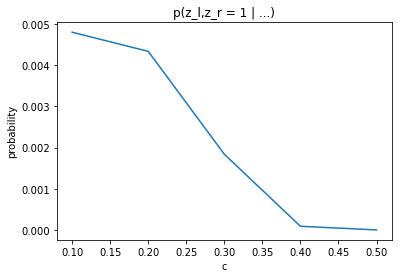

In [14]:
plt.plot(np.array([0.1,0.2,0.3,0.4,0.5]),np.array([0.00479548,0.00433213,0.00183596,8.95794676e-05,1.05942609e-06]))
plt.xlabel('c')
plt.ylabel('probability')
plt.title('p(z_l,z_r = 1 | ...)')

Text(0.5, 1.0, 'p(z_l,z_r = 1,1|...)')

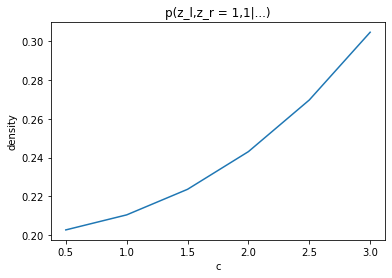

In [15]:
p11=np.array([0.20257935,2.10356080e-01,2.23575974e-01,2.43058931e-01,2.69751784e-001,3.04777499e-001])
x = np.array([0.5,1,1.5,2,2.5,3])
plt.plot(x,p11)
plt.xlabel('c')
plt.ylabel('density')
plt.title('p(z_l,z_r = 1,1|...)')

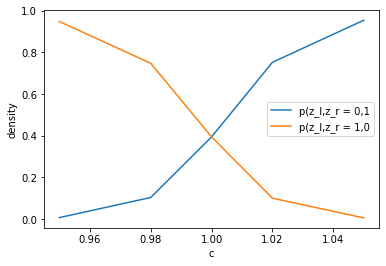

In [16]:
p01= np.array([7.32957102e-03,1.03781526e-01,3.94821960e-01,7.52949220e-01,9.54651775e-01])
p10 = np.array([9.48384378e-01,7.47960613e-01,3.94821960e-01,1.00387249e-01,5.74958219e-03])
x = np.array([0.95,0.98,1,1.02,1.05])
plt.plot(x,p01)
plt.plot(x,p10)
plt.xlabel('c')
plt.ylabel('density')
plt.legend(['p(z_l,z_r = 0,1','p(z_l,z_r = 1,0'])